# 학습목표

- 정칙화(Regularization)의 개념을 이해하고 정규화(Normalization)와 구분합니다.
- L1 regularization과 L2 regularization의 차이를 설명합니다.
- 실습을 통하여 Lp norm, Dropout, Batch Normalization에 대해 학습합니다.

## Regularization과 Normalization

In [1]:
from sklearn.datasets import load_iris
import pandas as pd 
import matplotlib.pyplot as plt

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
target_df = pd.DataFrame(data=iris.target, columns=['species'])

# 0, 1, 2로 되어있는 target 데이터를 
# 알아보기 쉽게 'setosa', 'versicolor', 'virginica'로 바꿉니다 
def converter(species):
    if species == 0:
        return 'setosa'
    elif species == 1:
        return 'versicolor'
    else:
        return 'virginica'

target_df['species'] = target_df['species'].apply(converter)

iris_df = pd.concat([iris_df, target_df], axis=1)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
X = [iris_df['petal length (cm)'][a] for a in iris_df.index if iris_df['species'][a]=='virginica']
Y = [iris_df['sepal length (cm)'][a] for a in iris_df.index if iris_df['species'][a]=='virginica']

print(X)
print(Y)

[6.0, 5.1, 5.9, 5.6, 5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5.0, 5.1, 5.3, 5.5, 6.7, 6.9, 5.0, 5.7, 4.9, 6.7, 4.9, 5.7, 6.0, 4.8, 4.9, 5.6, 5.8, 6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1, 5.9, 5.7, 5.2, 5.0, 5.2, 5.4, 5.1]
[6.3, 5.8, 7.1, 6.3, 6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5, 7.7, 7.7, 6.0, 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2, 7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6.0, 6.9, 6.7, 6.9, 5.8, 6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9]


> #### 직관적인 이해를 위해 scatterplot 으로 그려보기

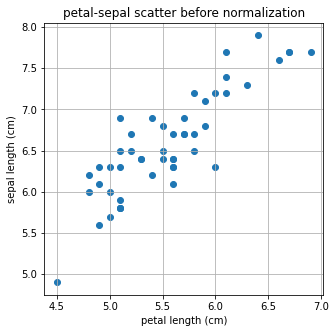

In [3]:
plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.title('petal-sepal scatter before normalization') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

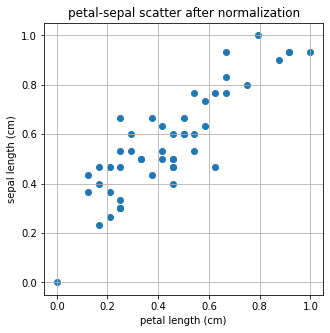

In [4]:
from sklearn.preprocessing import minmax_scale

X_scale = minmax_scale(X)
Y_scale = minmax_scale(Y)

plt.figure(figsize=(5,5))
plt.scatter(X_scale,Y_scale)
plt.title('petal-sepal scatter after normalization') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

--------------------
--------------------
--------------------
--------------------

<AxesSubplot:>

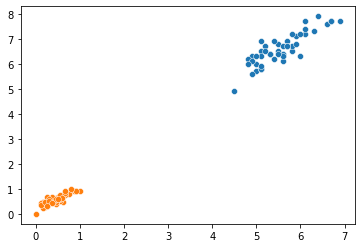

In [7]:
import seaborn as sns

plt.figure()
sns.scatterplot(x=X, y=Y)
sns.scatterplot(x=X_scale, y=Y_scale)

--------------------
--------------------
--------------------
--------------------

> #### regularization에 대해 알아보기

In [8]:
from sklearn.linear_model import LinearRegression
import numpy as np 

X = np.array(X)
Y = np.array(Y)

# Iris Dataset을 Linear Regression으로 학습합니다. 
linear= LinearRegression()
linear.fit(X.reshape(-1,1), Y)

# Linear Regression의 기울기와 절편을 확인합니다. 
a, b=linear.coef_, linear.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

기울기 : 1.00, 절편 : 1.06


In [10]:
print(a)
print(b)

[0.99573864]
1.059659090909089


> 위의 기울기, 절편을 통해 fit된 직선을 만들어보기

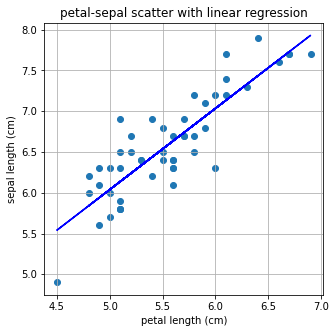

In [11]:
plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.plot(X,linear.predict(X.reshape(-1,1)),'-b')
plt.title('petal-sepal scatter with linear regression') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

### L1, L2 Regularization 사용

> L1을 사용하는 Lasso 먼저 확인

기울기 : 0.00, 절편 : 6.59


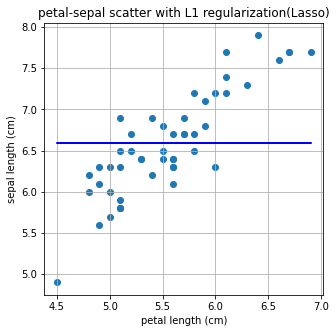

In [13]:
#L1 regularization은 Lasso로 import 합니다.
from sklearn.linear_model import Lasso

L1 = Lasso()
L1.fit(X.reshape(-1,1), Y)
a, b=L1.coef_, L1.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.plot(X,L1.predict(X.reshape(-1,1)),'-b')
plt.title('petal-sepal scatter with L1 regularization(Lasso)') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

In [14]:
print(a)
print(b)

[0.]
6.587999999999998


> - 기울기가 0이다.
> - 방정식을 제대로 풀지 못하고 있다.

> L2를 쓰는 Ridge로 확인

기울기 : 0.93, 절편 : 1.41


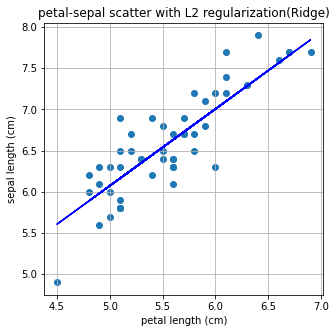

In [15]:
#L2 regularization은 Ridge로 import 합니다. 
from sklearn.linear_model import Ridge

L2 = Ridge()
L2.fit(X.reshape(-1,1), Y)
a, b = L2.coef_, L2.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.plot(X,L2.predict(X.reshape(-1,1)),'-b')
plt.title('petal-sepal scatter with L2 regularization(Ridge)') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

> #### note:
> - `Lasso`, `Ridge`가 다르게 나오는데 `Ridge`가 `Linear Regression`과 비슷하게 나오는 이유는
> - Linear Regression이 `L2 norm`과 관련 있기 때문이다.

## L1 Regularization

- L1 norm 에 대한 이해를 통해 `Lasso`를 언제 쓰는지 알아보자

#### 이전 스텝에서 왜 L1 Regularization 만 답이 나오지 않았을까?

`p=1`인 경우 $\beta_0$ 에 대해 미분하는 과정에서 $\lambda$가 사라지므로 Regularization의 효과를 볼 수 없습니다. $X$가 **1차원 값인 선형회귀분석 같은 경우에는 L1 Regularization이 의미가 없다**는 것을 말합니다. 그러므로, L1 Regularization을 사용할 때는 **X가 2차원 이상인 여러 컬럼 값이 있는 데이터일 때** 실제 효과를 볼 수 있습니다.

### 컬럼 수가 많은 데이터에서의 L1 regularization 비교

- 총 13개의 컬럼을 갖는 wind data로 비교해보자

In [17]:
from sklearn.datasets import load_wine

wine = load_wine()
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
target_df = pd.DataFrame(data=wine.target, columns=['Y'])

In [21]:
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [22]:
target_df.head()

,Y
0,0
1,0
2,0
3,0
4,0


> - 먼저 linear regression으로 문제를 풀어보고
> - 해당 문제에서의 mean absolute error, mean sqaured error, root mean sqaured error를 구해보자

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 데이터를 준비하고
X_train, X_test, y_train, y_test = train_test_split(wine_df, target_df, test_size=0.3, random_state=101)

# 모델을 훈련시킵니다.
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트를 해볼까요?
model.predict(X_test)
pred = model.predict(X_test)

# 테스트 결과는 이렇습니다!
print("result of linear regression")
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

print("\n\n coefficient linear regression")
print(model.coef_)

result of linear regression
Mean Absolute Error: 0.25128973939722626
Mean Squared Error: 0.1062458740952556
Mean Root Squared Error: 0.32595379134971814


 coefficient linear regression
[[-8.09017190e-02  4.34817880e-02 -1.18857931e-01  3.65705449e-02
  -4.68014203e-04  1.41423581e-01 -4.54107854e-01 -5.13172664e-01
   9.69318443e-02  5.34311136e-02 -1.27626604e-01 -2.91381844e-01
  -5.72238959e-04]]


> - L1 regularization으로 문제를 풀어보자

In [24]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 모델을 준비하고 훈련시킵니다.
L1 = Lasso(alpha=0.05)
L1.fit(X_train, y_train)

# 테스트를 해봅시다.
pred = L1.predict(X_test)

# 모델 성능은 얼마나 좋을까요?
print("result of Lasso")
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

print("\n\n coefficient of Lasso")
print(L1.coef_)

result of Lasso
Mean Absolute Error: 0.24233731936122138
Mean Squared Error: 0.0955956894578189
Mean Root Squared Error: 0.3091855259513597


 coefficient of Lasso
[-0.          0.01373795 -0.          0.03065716  0.00154719 -0.
 -0.34143614 -0.          0.          0.06755943 -0.         -0.14558153
 -0.00089635]


### 결과 분석

#### 아이펠 설명

coefficient 부분을 보시면 Linear Regression과 L1 Regularization의 차이가 좀 더 두드러짐을 알 수 있습니다. Linear Regression에서는 모든 컬럼의 가중치를 탐색하여 구하는 반면, L1 Regularization에서는 총 13개 중 7개를 제외한 나머지의 값들이 모두 0임을 확인할 수 있습니다. Error 부분에서는 큰 차이가 없었지만, 우리가 어떤 컬럼이 결과에 영향을 더 크게 미치는지 확실히 확인할 수 있습니다. 이러한 경우 다른 문제에서도 error의 차이가 크게 나지 않는다면, 차원 축소와 비슷한 개념으로 변수의 값을 7개만 남겨도 충분히 결과를 예측할 수 있습니다. 다만 Linear Regression과 L1, L2 Regularization의 차이 중 하나는 $\alpha$라는 하이퍼파라미터(수식에서는 $\lambda$)가 하나 더 들어간다는 것이고, 그 값에 따라 error에 영향을 미친다는 점입니다.

## L2 Regularization

### L2 Regularization(Ridge) 의 정의


### L1 / L2 Regularization의 차이점

> iteration 숫자를 제약 조건으로 주고 실험 예정

In [26]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

wine = load_wine()
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
target_df = pd.DataFrame(data=wine.target, columns=['Y'])
X_train, X_test, y_train, y_test = train_test_split(wine_df, target_df, test_size= 0.3, random_state=101)
print('=3')

=3


In [27]:
from sklearn.linear_model import Lasso

L1 = Lasso(alpha=0.05, max_iter=5)
L1.fit(X_train, y_train)
pred = L1.predict(X_test)

print("result of Lasso")
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

print("\n\n coefficient of Lasso")
print(L1.coef_)

result of Lasso
Mean Absolute Error: 0.24845768841769436
Mean Squared Error: 0.10262989110341268
Mean Root Squared Error: 0.32035900346862844


 coefficient of Lasso
[-0.          0.         -0.          0.03295564  0.00109495  0.
 -0.4027847   0.          0.          0.06023131 -0.         -0.12001119
 -0.00078971]


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.924145836492522, tolerance: 0.007479838709677421
  positive)


In [28]:
from sklearn.linear_model import Ridge

L2 = Ridge(alpha=0.05,max_iter=5)
L2.fit(X_train, y_train)
pred = L2.predict(X_test)

print("result of Ridge")
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

print("\n\n coefficient of Ridge")
print(L2.coef_)

result of Ridge
Mean Absolute Error: 0.2511466959936429
Mean Squared Error: 0.10568076460795563
Mean Root Squared Error: 0.3250857803841251


 coefficient of Ridge
[[-8.12456257e-02  4.35541496e-02 -1.21661565e-01  3.65979773e-02
  -3.94014013e-04  1.39168707e-01 -4.50691113e-01 -4.87216747e-01
   9.54111059e-02  5.37077039e-02 -1.28602933e-01 -2.89832790e-01
  -5.73136185e-04]]


#### 아이펠 설명

iteration 값을 5로만 설정해 보아도, L2 Regularization의 문제는 Linear Regression과 같은 값이 나오지만, L1 Regularization에서는 앞 step과 같은 값을 확인할 수는 없었습니다. 심지어 수렴하지 않았다는 경고까지 나오는군요! 이는 아직 다른 조건들을 만족하는 답을 찾지 못하였다는 뜻입니다.

정리하면, `L1 Regularization`은 **가중치가 적은** 벡터에 해당하는 계수를 `0`으로 보내면서 차원 축소와 비슷한 역할을 하는 것이 특징이며, `L2 Regularization`은 0이 아닌 0에 가깝게 보내지만 **제곱 텀**이 있기 때문에 L1 Regularization보다는 **수렴 속도가 빠르다**는 장점이 있습니다. 예를 들어, $A=[1,1,1,1,1]$ , $B=[5,0,0,0,0]$ 의 경우 L1-norm은 같지만, L2-norm은 같지 않습니다. 즉, **제곱 텀에서 결과에 큰 영향을 미치는 값은 더 크게, 결과에 영향이 적은 값들은 더 작게 보내면서 수렴 속도가 빨라지는 것**입니다.



## Extra : Lp norm

### vector norm

- p를 바꿔가면서 실험해보기

In [29]:
x=np.array([1,10,1,1,1])
p=5
norm_x=np.linalg.norm(x, ord=p)
making_norm = (sum(x**p))**(1/p)
print("result of numpy package norm function : %0.5f "%norm_x) 
print("result of making norm : %0.5f "%making_norm)

result of numpy package norm function : 10.00008 
result of making norm : 10.00008 


> - p=inf 일 경우에는 가장 벡터 요소 중 큰 숫자를 출력

In [38]:
norm_x=np.linalg.norm(x, ord=np.inf)
print("result of infinite norm : %0.5f "%norm_x)

result of infinite norm : 10.00000 


--------------
--------------
--------------
--------------

In [30]:
p=1
norm_x=np.linalg.norm(x, ord=p)
making_norm = (sum(x**p))**(1/p)
print("result of numpy package norm function : %0.5f "%norm_x) 
print("result of making norm : %0.5f "%making_norm)

result of numpy package norm function : 14.00000 
result of making norm : 14.00000 


In [31]:
p=2
norm_x=np.linalg.norm(x, ord=p)
making_norm = (sum(x**p))**(1/p)
print("result of numpy package norm function : %0.5f "%norm_x) 
print("result of making norm : %0.5f "%making_norm)

result of numpy package norm function : 10.19804 
result of making norm : 10.19804 


In [32]:
p=3
norm_x=np.linalg.norm(x, ord=p)
making_norm = (sum(x**p))**(1/p)
print("result of numpy package norm function : %0.5f "%norm_x) 
print("result of making norm : %0.5f "%making_norm)

result of numpy package norm function : 10.01332 
result of making norm : 10.01332 


result of numpy package norm function : 2.00000 
result of making norm : 2.00000 
result of numpy package norm function : 1.41421 
result of making norm : 1.41421 
result of numpy package norm function : 1.25992 
result of making norm : 1.25992 
result of numpy package norm function : 1.18921 
result of making norm : 1.18921 
result of numpy package norm function : 1.14870 
result of making norm : 1.14870 


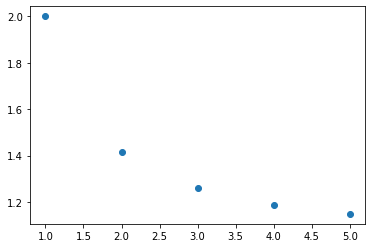

In [37]:
test_x = np.array([1,1])
p_list = []
norm_list = []
for i in range(1, 5+1):
    p = i
    norm_x = np.linalg.norm(test_x, ord=p)
    making_norm = (sum(test_x**p))**(1/p)
    p_list.append(i)
    norm_list.append(making_norm)
    print("result of numpy package norm function : %0.5f "%norm_x) 
    print("result of making norm : %0.5f "%making_norm)
    print('=======================================')
plt.figure()
plt.scatter(p_list, norm_list)
plt.show()

--------------
--------------
--------------
--------------

### matrix norm

- vector norm과 조금 다르다.
- 주로 p=1, 혹은 inf일 때만 알면 된다.
> - p=1인 경우에는 컬럼의 합이 가장 큰 값이 출력되고, p=∞인 경우에는 로우의 합이 가장 큰 값이 출력
> - 인터넷에서 수식 찾아서 보면 이해간다.

In [39]:
A=np.array([[1,2,3],[1,2,3],[4,6,8]])
inf_norm_A=np.linalg.norm(A, ord=np.inf)
print("result inf norm of A :", inf_norm_A)
one_norm_A=np.linalg.norm(A, ord=1)
print("result one norm of A :", one_norm_A)

result inf norm of A : 18.0
result one norm of A : 14.0


## Dropout

### 실습 (not overfitting)

- fashion mnist를 통해 확인해보기
- epoch 5 정도면 결과가 나옴(데이터가 간단해서)

In [40]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

fashion_mnist = keras.datasets.fashion_mnist
print('=3')

=3


In [41]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images / 255.0
test_images = test_images / 255.0

> - dropout rate : 0.9

In [42]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    # 여기에 dropout layer를 추가해보았습니다. 나머지 layer는 아래의 실습과 같습니다.
    keras.layers.Dropout(0.9),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6385 - accuracy: 0.3795
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.1949 - accuracy: 0.5232
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.1381 - accuracy: 0.5417
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0960 - accuracy: 0.5573
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0847 - accuracy: 0.5548


In [45]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    # 이번에는 dropout layer가 없습니다. 
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6259 - accuracy: 0.7796
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3840 - accuracy: 0.8609
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3370 - accuracy: 0.8772
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3091 - accuracy: 0.8860
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2896 - accuracy: 0.8912


> - 이미지 데이터이지만 fully connect layer로도 잘 학습됨
> - 반면 dropout이 학습에서 규제하는 모습을 보여줬다.

------------------------------------
------------------------------------
------------------------------------
------------------------------------

In [43]:
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(28,28)),
    keras.layers.Dropout(0.9),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

histroy = model.fit(train_images, train_labels, epochs=5)

Epoch 1/5


ValueError: in user code:

    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:805 train_function  *
        return step_function(self, iterator)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:788 run_step  **
        outputs = model.train_step(data)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:756 train_step
        y, y_pred, sample_weight, regularization_losses=self.losses)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/compile_utils.py:203 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/losses.py:152 __call__
        losses = call_fn(y_true, y_pred)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/losses.py:256 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/losses.py:1569 sparse_categorical_crossentropy
        y_true, y_pred, from_logits=from_logits, axis=axis)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/backend.py:4941 sparse_categorical_crossentropy
        labels=target, logits=output)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/ops/nn_ops.py:4241 sparse_softmax_cross_entropy_with_logits_v2
        labels=labels, logits=logits, name=name)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/ops/nn_ops.py:4156 sparse_softmax_cross_entropy_with_logits
        logits.get_shape()))

    ValueError: Shape mismatch: The shape of labels (received (32, 1)) should equal the shape of logits except for the last dimension (received (32, 28, 10)).


In [44]:
train_images.shape

(60000, 28, 28)

------------------------------------
------------------------------------
------------------------------------
------------------------------------

### 실습 (overfitting)

#### 아이펠 설명

overfitting이 되는지 확인해 보려면 train set과 validation set의 loss function을 그려보는 것이 가장 첫 번째 시도입니다. 우리는 위의 데이터를 이제 train:valid=99:1로 split 한 뒤에 loss function의 값을 그려보고, overfitting 이 나는 fully connected layer를 만들어보도록 합시다. overfitting이 되게 하기 위해 의도적으로 train set을 99%로 늘리고 validation set을 줄였습니다.

In [46]:
X_train, X_valid, y_train, y_valid = train_test_split(train_images, train_labels, test_size=0.01, random_state=101)
X_train = X_train / 255.0
X_valid = X_valid / 255.0

#Dense layer만으로 만들어 낸 classification 모델입니다.
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(X_train, y_train, epochs=200, batch_size=512, validation_data=(X_valid, y_valid))

Epoch 1/200
117/117 [==============================] - 1s 6ms/step - loss: 2.2072 - accuracy: 0.3482 - val_loss: 1.6631 - val_accuracy: 0.6100
Epoch 2/200
117/117 [==============================] - 0s 4ms/step - loss: 1.5392 - accuracy: 0.5859 - val_loss: 1.1912 - val_accuracy: 0.6733
Epoch 3/200
117/117 [==============================] - 0s 3ms/step - loss: 1.1478 - accuracy: 0.6692 - val_loss: 0.9687 - val_accuracy: 0.7217
Epoch 4/200
117/117 [==============================] - 0s 3ms/step - loss: 0.9428 - accuracy: 0.7067 - val_loss: 0.8296 - val_accuracy: 0.7550
Epoch 5/200
117/117 [==============================] - 0s 3ms/step - loss: 0.8194 - accuracy: 0.7329 - val_loss: 0.7495 - val_accuracy: 0.7733
Epoch 6/200
117/117 [==============================] - 0s 3ms/step - loss: 0.7539 - accuracy: 0.7433 - val_loss: 0.6995 - val_accuracy: 0.7683
Epoch 7/200
117/117 [==============================] - 0s 3ms/step - loss: 0.7004 - accuracy: 0.7535 - val_loss: 0.6623 - val_accuracy: 0.7783

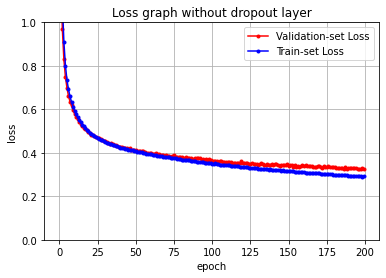

In [47]:
# loss 값을 plot 해보겠습니다.
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.title('Loss graph without dropout layer') 
plt.ylim(0,1)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

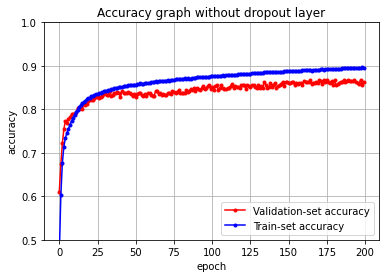

In [48]:
# accuracy 값을 plot 해보겠습니다.
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1) 
plt.title('Accuracy graph without dropout layer') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [49]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    # 여기에 dropout layer를 추가해보았습니다. 나머지 layer는 위의 실습과 같습니다. 
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(X_train, y_train, epochs=200, batch_size=512, validation_data=(X_valid, y_valid))

Epoch 1/200
117/117 [==============================] - 1s 4ms/step - loss: 2.2140 - accuracy: 0.4025 - val_loss: 1.6939 - val_accuracy: 0.5817
Epoch 2/200
117/117 [==============================] - 0s 3ms/step - loss: 1.5796 - accuracy: 0.5388 - val_loss: 1.2251 - val_accuracy: 0.6700
Epoch 3/200
117/117 [==============================] - 0s 3ms/step - loss: 1.2064 - accuracy: 0.6161 - val_loss: 1.0097 - val_accuracy: 0.7250
Epoch 4/200
117/117 [==============================] - 0s 3ms/step - loss: 1.0263 - accuracy: 0.6594 - val_loss: 0.8788 - val_accuracy: 0.7350
Epoch 5/200
117/117 [==============================] - 0s 3ms/step - loss: 0.9093 - accuracy: 0.6937 - val_loss: 0.7910 - val_accuracy: 0.7600
Epoch 6/200
117/117 [==============================] - 0s 3ms/step - loss: 0.8295 - accuracy: 0.7114 - val_loss: 0.7373 - val_accuracy: 0.7517
Epoch 7/200
117/117 [==============================] - 0s 3ms/step - loss: 0.7766 - accuracy: 0.7252 - val_loss: 0.6940 - val_accuracy: 0.7733

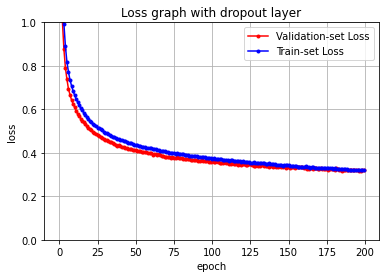

In [50]:
# loss 값을 plot 해보겠습니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.ylim(0,1)
plt.title('Loss graph with dropout layer') 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

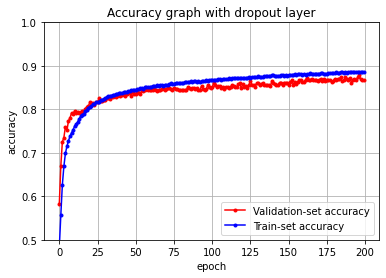

In [51]:
# accuracy 값을 plot 해보겠습니다. 
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1) 
plt.title('Accuracy graph with dropout layer') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

## Batch Normalization

### 실습

아무것도 하지 않은 fully connected layer와 Batch Normalization layer를 추가한 두 실험을 비교하고자 합니다. 중점적으로 봐야 할 내용은 **정확도 비교와 속도의 차이**입니다.

In [61]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist
print('=3')

=3


In [62]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images / 255.0
test_images = test_images / 255.0

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(train_images, train_labels, test_size=0.3, random_state=101)

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(X_train, y_train, epochs=20, batch_size=2048, validation_data=(X_valid, y_valid))

Epoch 1/20
21/21 [==============================] - 1s 24ms/step - loss: 1.7286 - accuracy: 0.4312 - val_loss: 0.7761 - val_accuracy: 0.7326
Epoch 2/20
21/21 [==============================] - 0s 7ms/step - loss: 0.7125 - accuracy: 0.7537 - val_loss: 0.6095 - val_accuracy: 0.7976
Epoch 3/20
21/21 [==============================] - 0s 7ms/step - loss: 0.5810 - accuracy: 0.8057 - val_loss: 0.5451 - val_accuracy: 0.8167
Epoch 4/20
21/21 [==============================] - 0s 7ms/step - loss: 0.5270 - accuracy: 0.8230 - val_loss: 0.5105 - val_accuracy: 0.8260
Epoch 5/20
21/21 [==============================] - 0s 7ms/step - loss: 0.4897 - accuracy: 0.8349 - val_loss: 0.4864 - val_accuracy: 0.8369
Epoch 6/20
21/21 [==============================] - 0s 7ms/step - loss: 0.4682 - accuracy: 0.8403 - val_loss: 0.4719 - val_accuracy: 0.8397
Epoch 7/20
21/21 [==============================] - 0s 7ms/step - loss: 0.4585 - accuracy: 0.8460 - val_loss: 0.4558 - val_accuracy: 0.8442
Epoch 8/20
21/21 [=

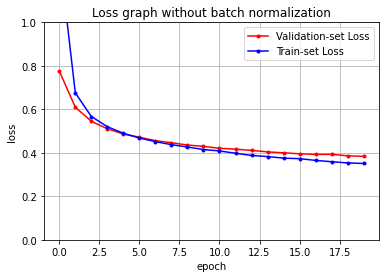

In [64]:
# loss 값을 plot 해보겠습니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.ylim(0,1)
plt.title('Loss graph without batch normalization') 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

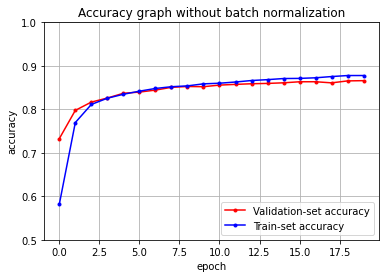

In [65]:
# accuracy 값을 plot 해보겠습니다. 
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1)
plt.title('Accuracy graph without batch normalization') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

#### BatchNoramlization layer를 추가한 실습

In [66]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    #여기에 batchnormalization layer를 추가해보았습니다. 나머지 layer는 위의 실습과 같습니다.
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(X_train, y_train, epochs=20, batch_size=2048, validation_data=(X_valid, y_valid))

Epoch 1/20
21/21 [==============================] - 1s 17ms/step - loss: 1.3686 - accuracy: 0.5438 - val_loss: 1.0523 - val_accuracy: 0.6618
Epoch 2/20
21/21 [==============================] - 0s 8ms/step - loss: 0.5358 - accuracy: 0.8156 - val_loss: 0.8783 - val_accuracy: 0.7222
Epoch 3/20
21/21 [==============================] - 0s 8ms/step - loss: 0.4577 - accuracy: 0.8430 - val_loss: 0.7684 - val_accuracy: 0.7744
Epoch 4/20
21/21 [==============================] - 0s 8ms/step - loss: 0.4112 - accuracy: 0.8590 - val_loss: 0.6781 - val_accuracy: 0.8162
Epoch 5/20
21/21 [==============================] - 0s 7ms/step - loss: 0.3843 - accuracy: 0.8680 - val_loss: 0.6145 - val_accuracy: 0.8416
Epoch 6/20
21/21 [==============================] - 0s 8ms/step - loss: 0.3605 - accuracy: 0.8766 - val_loss: 0.5815 - val_accuracy: 0.8513
Epoch 7/20
21/21 [==============================] - 0s 8ms/step - loss: 0.3440 - accuracy: 0.8820 - val_loss: 0.5418 - val_accuracy: 0.8596
Epoch 8/20
21/21 [=

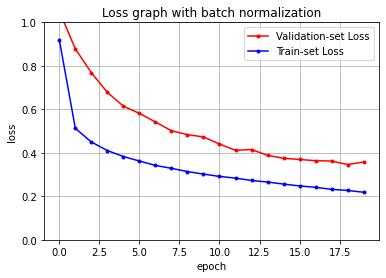

In [67]:
# loss 값을 plot 해보겠습니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.ylim(0,1)
plt.title('Loss graph with batch normalization') 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

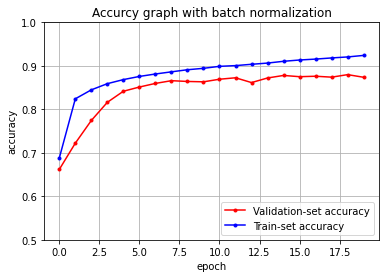

In [68]:
# accuracy 값을 plot 해보겠습니다. 
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1) 
plt.title('Accurcy graph with batch normalization') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()